<a href="https://colab.research.google.com/github/jeevankumar20/INFO_5731_Spring2023/blob/main/Jeevan_In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2023)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# install pyLDAvis
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries and modules for topic modeling







# We suppress the DeprecationWarning from warnings module
import re
import numpy as np
import pandas as pd
from pprint import pprint

# # Gensim is a popular natural language processing library for Python
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy is another NLP library for Python that is used for lemmatization
import spacy

# pyLDAvis is a library for interactive topic model visualization in Python
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
%matplotlib inline

# We enable logging for gensim to see the progress of the topic modeling process
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/updatedreviews1.csv")#You can find the csv file in my github link

#Cleaning the data
import re

def cleantext(tweets):
    text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers
    
    return text

df["Cleaned Reviews"] = df["Cleaned Reviews"].apply(cleantext)

# Convert to list
data = df['Cleaned Reviews'].values.tolist()

In [ ]:
# This function takes a list of sentences as input
def sent_to_words(sentences):
    # Iterate over each sentence in the input list
    for sentence in sentences:
        # Use Gensim's simple_preprocess() function to tokenize the sentence and remove punctuation
        # The deacc=True parameter tells the function to remove accent marks as well
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Call the sent_to_words function and pass in the data list as input
# Convert the output of sent_to_words to a list and assign it to the data_words variable
data_words = list(sent_to_words(data))


In [ ]:
b = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
t = gensim.models.Phrases(b[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bmod = gensim.models.phrases.Phraser(b)
tmod = gensim.models.phrases.Phraser(t)

# See trigram example
print(tmod[bmod[data_words[0]]])

['strong', 'suit', 'first', 'avatar', 'movie', 'sure', 'story', 'retelling', 'pocahontas', 'scifi', 'context', 'etc', 'rate', 'one', 'straight', 'expect', 'sophisticated', 'plot', 'something', 'substantial', 'like', 'expected', 'story', 'nothing', 'worth', 'mention', 'remarkable', 'fore', 'sure', 'way', 'water', 'bad', 'experience', 'effect', 'fine', 'production', 'superb', 'dare', 'say', 'liked', 'first', 'one', 'like', 'one', 'likely', 'entertained', 'trip', 'lengthy', 'part', 'cutting', 'like', 'many', 'production', 'day', 'would', 'done', 'magick', 'experience', 'way', 'water', 'also', 'sensation', 'new', 'style', 'like', 'movie', 'like', 'first', 'matrix', 'sin', 'city', 'avatar', 'provided', 'gone', 'know', 'get', 'gotta', 'confess', 'slightly', 'bored', 'sometimes', 'like', 'watching', 'cinematic', 'well', 'made', 'computer', 'game', 'humble', 'opinion', 'medium', 'mostly', 'overpraise', 'work', 'james', 'cameron', 'like', 'dune', 'remake', 'denis', 'villeneuve', 'eyecandy', 'ye

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bmod[doc] for doc in texts]

def make_trigrams(texts):
    return [tmod[bmod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['strong', 'suit', 'first', 'movie', 'sure', 'story', 'retell', 'scifi', 'context', 'rate', 'straight', 'expect', 'sophisticated', 'plot', 'substantial', 'expect', 'story', 'worth', 'mention', 'remarkable', 'fore', 'sure', 'way', 'water', 'bad', 'experience', 'effect', 'fine', 'production', 'superb', 'dare', 'say', 'like', 'first', 'likely', 'entertain', 'trip', 'lengthy', 'part', 'cut', 'many', 'production', 'day', 'do', 'experience', 'way', 'water', 'also', 'sensation', 'new', 'style', 'movie', 'first', 'matrix', 'sin', 'city', 'avatar', 'provide', 'go', 'know', 'get', 'get', 'confess', 'slightly', 'bore', 'sometimes', 'watch', 'cinematic', 'well', 'make', 'computer', 'game', 'humble', 'opinion', 'medium', 'mostly', 'overpraise', 'work', 'remake', 'villeneuve', 'cinematic', 'masterpiece']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 3), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 2), (66, 2), (67, 1), (68, 1), (69, 1)]]


In [ ]:
id2word[0]

'also'

In [ ]:
 #extracting the words and frequencies from the first item in the corpus using the id2word dictionary to convert the word IDs to actual words.
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('also', 1),
  ('avatar', 1),
  ('bad', 1),
  ('bore', 1),
  ('cinematic', 2),
  ('city', 1),
  ('computer', 1),
  ('confess', 1),
  ('context', 1),
  ('cut', 1),
  ('dare', 1),
  ('day', 1),
  ('do', 1),
  ('effect', 1),
  ('entertain', 1),
  ('expect', 2),
  ('experience', 2),
  ('fine', 1),
  ('first', 3),
  ('fore', 1),
  ('game', 1),
  ('get', 2),
  ('go', 1),
  ('humble', 1),
  ('know', 1),
  ('lengthy', 1),
  ('like', 1),
  ('likely', 1),
  ('make', 1),
  ('many', 1),
  ('masterpiece', 1),
  ('matrix', 1),
  ('medium', 1),
  ('mention', 1),
  ('mostly', 1),
  ('movie', 2),
  ('new', 1),
  ('opinion', 1),
  ('overpraise', 1),
  ('part', 1),
  ('plot', 1),
  ('production', 2),
  ('provide', 1),
  ('rate', 1),
  ('remake', 1),
  ('remarkable', 1),
  ('retell', 1),
  ('say', 1),
  ('scifi', 1),
  ('sensation', 1),
  ('sin', 1),
  ('slightly', 1),
  ('sometimes', 1),
  ('sophisticated', 1),
  ('story', 2),
  ('straight', 1),
  ('strong', 1),
  ('style', 1),
  ('substantial', 1),
  

In [ ]:
# Create an LDA model using the provided parameters
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.009*"king" + 0.006*"solution" + 0.004*"window" + 0.002*"hardcore" + 0.001*"gaming" + 0.001*"blah" + 0.000*"vomit" + 0.000*"honey" + 0.000*"dethrone" + 0.000*"weirdness"'), (1, '0.005*"nicely" + 0.005*"variety" + 0.005*"narratively" + 0.003*"seeing" + 0.002*"blur" + 0.002*"impatient" + 0.001*"livingthis" + 0.001*"qualitythey" + 0.001*"bestmagnificent" + 0.001*"topnotch"'), (2, '0.030*"movie" + 0.018*"film" + 0.014*"story" + 0.013*"first" + 0.011*"character" + 0.011*"see" + 0.010*"avatar" + 0.010*"make" + 0.009*"way" + 0.009*"good"'), (3, '0.004*"pit" + 0.003*"bury" + 0.002*"experiment" + 0.000*"bottomless" + 0.000*"imbecile" + 0.000*"precedence" + 0.000*"graphical" + 0.000*"kickass" + 0.000*"soulless" + 0.000*"plotless"'), (4, '0.014*"lie" + 0.012*"final_battle" + 0.008*"nasty" + 0.007*"smart" + 0.007*"sinking_ship" + 0.006*"directly" + 0.006*"hardly" + 0.005*"noticeable" + 0.005*"ton" + 0.005*"shout"'), (5, '0.014*"jaw" + 0.012*"horrible" + 0.012*"finale" + 0.012*"replace" + 0.

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.918117979969137

Coherence Score:  0.4995956406123979


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.390934 -0.016657       1        1  97.952688
4     -0.095155 -0.140027       2        1   1.232417
7     -0.053594  0.059631       3        1   0.330405
9     -0.041791  0.025633       4        1   0.160172
5     -0.041689  0.026615       5        1   0.156484
1     -0.033822  0.011937       6        1   0.064255
0     -0.032667  0.010520       7        1   0.041265
6     -0.031090  0.007881       8        1   0.025847
3     -0.031219  0.008175       9        1   0.024823
8     -0.029907  0.006292      10        1   0.011645, topic_info=        Term        Freq       Total Category  logprob  loglift
241      big  207.000000  207.000000  Default  30.0000  30.0000
229  amazing  208.000000  208.000000  Default  29.0000  29.0000
282      kid  209.000000  209.000000  Default  28.0000  28.0000
359     find  205.000000  205.000000  Default  27.0000  27.0000
390     seem  204.000000  204.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
25   lengthy    0.001123   11.090926  Topic10  -9.0864  -0.1395
26      like    0.001123  110.066266  Topic10  -9.0864  -2.4345
27    likely    0.001123   33.804789  Topic10  -9.0864  -1.2540
28      make    0.001123  802.383213  Topic10  -9.0864  -4.4210
29      many    0.001123  317.933324  Topic10  -9.0864  -3.4953

[403 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1082      4  0.832896     accent
2470      3  0.801754     afraid
0         1  0.998495       also
229       1  0.998302    amazing
2471      2  0.950093       army
...     ...       ...        ...
67        1  1.000631       well
329       3  0.737101  whalehunt
142       1  0.997438      whole
68        1  0.999318       work
330       1  1.000055      world

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 8, 10, 6, 2, 1, 7, 4, 9])

In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download and unzip the Mallet topic modeling software (assuming this code is running on a Linux system)
#!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#!unzip mallet-2.0.8.zip

# Set the path to the Mallet binary executable
mallet_path = "/content/mallet-2.0.8/bin/mallet"

# Create an LDA model using Mallet with 20 topics, using the Mallet binary located at the specified path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(12,
  [('world', 0.12094488188976378),
   ('create', 0.04220472440944882),
   ('beautiful', 0.03622047244094488),
   ('moment', 0.029606299212598424),
   ('build', 0.025196850393700787),
   ('place', 0.02393700787401575),
   ('action', 0.02047244094488189),
   ('story', 0.02015748031496063),
   ('creature', 0.01889763779527559),
   ('cast', 0.017952755905511812)]),
 (1,
  [('avatar', 0.10726325467361324),
   ('long', 0.04903463070793748),
   ('sequel', 0.04566349984676678),
   ('original', 0.030646644192460926),
   ('scene', 0.030340177750536317),
   ('hard', 0.027275513331290222),
   ('year', 0.023291449586270302),
   ('titanic', 0.02083971805087343),
   ('expectation', 0.018694452957401166),
   ('high', 0.01685565430585351)]),
 (5,
  [('human', 0.04046062869592281),
   ('people', 0.029878618113912233),
   ('nature', 0.02832244008714597),
   ('whale', 0.026766262060379707),
   ('planet', 0.023965141612200435),
   ('animal', 0.022408963585434174),
   ('sense', 0.019296607531901648),


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Call a function named compute_coherence_values to generate multiple LDA models and calculate the coherence values for each
# Pass in the dictionary, corpus, preprocessed text data, and various hyperparameters for the LDA models as arguments
# The function will return a list of LDA models and a list of coherence scores
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=2)


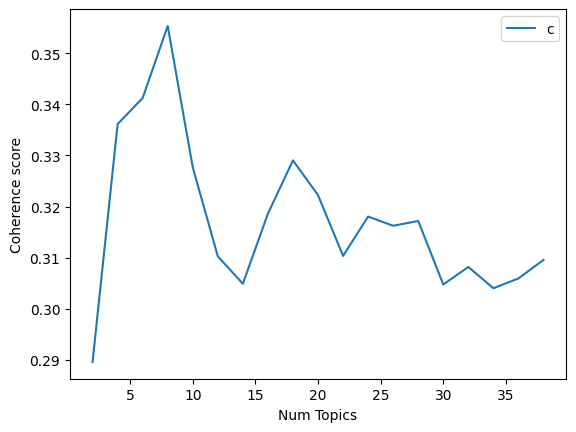

In [ ]:
 # Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Iterate over pairs of LDA models and their corresponding coherence values
# Print out the number of topics and coherence value for each model
# The zip() function pairs up the items in x and coherence_values with the same index, allowing them to be iterated over together
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.2895
Num Topics = 4  has Coherence Value of 0.3361
Num Topics = 6  has Coherence Value of 0.3413
Num Topics = 8  has Coherence Value of 0.3554
Num Topics = 10  has Coherence Value of 0.3277
Num Topics = 12  has Coherence Value of 0.3102
Num Topics = 14  has Coherence Value of 0.3049
Num Topics = 16  has Coherence Value of 0.3186
Num Topics = 18  has Coherence Value of 0.329
Num Topics = 20  has Coherence Value of 0.3222
Num Topics = 22  has Coherence Value of 0.3103
Num Topics = 24  has Coherence Value of 0.318
Num Topics = 26  has Coherence Value of 0.3162
Num Topics = 28  has Coherence Value of 0.3172
Num Topics = 30  has Coherence Value of 0.3047
Num Topics = 32  has Coherence Value of 0.3082
Num Topics = 34  has Coherence Value of 0.304
Num Topics = 36  has Coherence Value of 0.3059
Num Topics = 38  has Coherence Value of 0.3095


In [ ]:
# Select the model and print the topics
optimal_model = model_list[14]
#model_list[4] indicates that: model_list is a list that has been defined earlier and contains the number of topics and its coherence values.
# Since I have decided 10 to be the ideal number of topics, Topics number 30 is present in the 14th place of the list.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(5,
  '0.030*"back" + 0.028*"vfx" + 0.027*"pay" + 0.025*"high" + 0.024*"word" + '
  '0.021*"view" + 0.019*"reason" + 0.019*"message" + 0.019*"screen" + '
  '0.015*"clear"'),
 (22,
  '0.086*"long" + 0.084*"year" + 0.047*"great" + 0.027*"release" + '
  '0.026*"finally" + 0.024*"wait" + 0.022*"expectation" + 0.022*"rate" + '
  '0.021*"give" + 0.018*"explore"'),
 (18,
  '0.049*"money" + 0.047*"time" + 0.044*"dialogue" + 0.035*"boring" + '
  '0.033*"write" + 0.029*"waste" + 0.027*"review" + 0.027*"predictable" + '
  '0.025*"guess" + 0.020*"graphic"'),
 (28,
  '0.081*"people" + 0.040*"nature" + 0.029*"live" + 0.029*"human" + '
  '0.025*"move" + 0.025*"war" + 0.021*"culture" + 0.021*"destroy" + '
  '0.020*"planet" + 0.018*"native"'),
 (4,
  '0.541*"film" + 0.021*"return" + 0.017*"sequence" + 0.013*"technology" + '
  '0.013*"hope" + 0.012*"deserve" + 0.012*"incredible" + 0.011*"sequel" + '
  '0.010*"force" + 0.010*"minute"'),
 (17,
  '0.043*"effect" + 0.029*"cgi" + 0.018*"set" + 0.017*"presen

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
def preprocess_data(doc_set):
    """
    Input  : document list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()  # convert to lowercase
        tokens = tokenizer.tokenize(raw)  # tokenize using regex pattern
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

# Call the preprocess_data function on the variable data, which contains a list of documents
preprocess_data(data)


[['strong',
  'suit',
  'first',
  'avatar',
  'movi',
  'sure',
  'stori',
  'retel',
  'pocahonta',
  'scifi',
  'context',
  'etc',
  'rate',
  'one',
  'straight',
  'expect',
  'sophist',
  'plot',
  'someth',
  'substanti',
  'like',
  'expect',
  'stori',
  'noth',
  'worth',
  'mention',
  'remark',
  'fore',
  'sure',
  'way',
  'water',
  'bad',
  'experi',
  'effect',
  'fine',
  'product',
  'superb',
  'dare',
  'say',
  'like',
  'first',
  'one',
  'like',
  'one',
  'like',
  'entertain',
  'trip',
  'lengthi',
  'part',
  'cut',
  'like',
  'mani',
  'product',
  'day',
  'would',
  'done',
  'magick',
  'experi',
  'way',
  'water',
  'also',
  'sensat',
  'new',
  'style',
  'like',
  'movi',
  'like',
  'first',
  'matrix',
  'sin',
  'citi',
  'avatar',
  'provid',
  'gone',
  'know',
  'get',
  'gotta',
  'confess',
  'slightli',
  'bore',
  'sometim',
  'like',
  'watch',
  'cinemat',
  'well',
  'made',
  'comput',
  'game',
  'humbl',
  'opinion',
  'medium',
 

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
number_of_topics=7
words=10

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

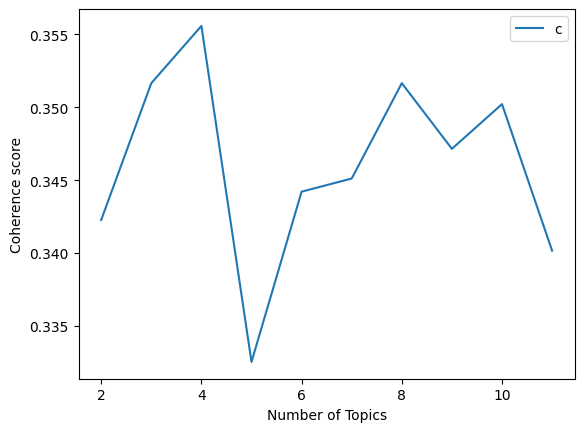

In [ ]:
start,stop,step=2,12,1
plot_graph(preprocess_data(data),start,stop,step)

In [ ]:

model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '0.384*"movi" + 0.311*"film" + 0.220*"first" + 0.209*"avatar" + 0.198*"charact" + 0.191*"like" + 0.190*"one" + 0.178*"stori" + 0.169*"cameron" + 0.150*"way"'), (1, '0.665*"film" + -0.637*"movi" + 0.137*"cameron" + 0.098*"way" + 0.095*"water" + 0.094*"avatar" + -0.076*"one" + -0.071*"watch" + 0.071*"sequel" + 0.053*"jake"'), (2, '0.423*"avatar" + -0.303*"film" + 0.269*"jake" + 0.268*"way" + 0.246*"water" + -0.226*"charact" + -0.210*"first" + 0.156*"cameron" + -0.154*"one" + 0.136*"quaritch"'), (3, '0.352*"jake" + -0.240*"avatar" + 0.236*"charact" + -0.206*"stori" + -0.206*"cameron" + -0.203*"movi" + 0.194*"quaritch" + 0.180*"famili" + 0.157*"get" + 0.147*"human"'), (4, '0.448*"movi" + 0.413*"film" + -0.216*"like" + -0.194*"way" + -0.193*"one" + -0.187*"cameron" + -0.165*"world" + 0.149*"jake" + -0.146*"much" + 0.134*"first"'), (5, '-0.392*"charact" + 0.366*"like" + 0.298*"first" + -0.215*"movi" + 0.173*"one" + -0.158*"film" + -0.136*"way" + -0.124*"play" + 0.119*"stori" + 0.117*"ja

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
!pip install lda2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploades = files.upload()

In [ ]:
npz = np.load(open('/content/topics.pyldavis.npz', 'rb'), allow_pickle=True)
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()


In [ ]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 jesus god orthodox faith verse worship belief christianity christian mormon
Topic 1 bike tire honda battery brake ride valve aluminum intake jeep
Topic 2 game team play win baseball score playoff mets goal phillies
Topic 3 shuttle nasa space payload computational planetary satellite mission launch lunar
Topic 4 armenian troop cyprus israel soldier agdam bayonet terror bullet he
Topic 5 drive controller battery dock connector ink card slot pin vram
Topic 6 key encrypt cryptosystem encryption cryptography secure rsa crypto eavesdrop decrypt
Topic 7 ride revolver bike bikers go jeep i dog a tank
Topic 8 homicide gun handgun firearm fbi unconstitutional federal smuggle drug weapon
Topic 9 israel armenian plo cyprus troop lebanese arab palestinian syria turkish
Topic 10 armenian bayonet arena team turkish tartar nhl playoff game defenseman
Topic 11 widget server contrib font editor format mit pixmap toolkit binary
Topic 12 controller card disk bios rom vram drive isa vga trident
Top

In [ ]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [ ]:
pyLDAvis.display(prepared_data)

In [ ]:
data = pd.read_csv("updatedreviews1.csv")#You can find the csv file in my github link

In [ ]:
data.head()

Cleaned Reviews
0  strong suit first avatar movie sure story rete...
1  sequel design look match first film longer imp...
2  james cameron film impressive special effect c...
3  dumbest thing could possibly donesthey within ...
4  james cameron brings biggest disappointment ye...

In [ ]:
#Getting Tokenization of News
tokenizer = RegexpTokenizer(r'\w+')
data['Cleaned Reviews'] = data['Cleaned Reviews'].apply(tokenizer.tokenize)

In [ ]:
stopwords_list = stopwords.words('english')

In [ ]:
data['Cleaned Reviews']=data['Cleaned Reviews'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
data['Cleaned Reviews'].head()

0    [strong, suit, first, avatar, movie, sure, sto...
1    [sequel, design, look, match, first, film, lon...
2    [james, cameron, film, impressive, special, ef...
3    [dumbest, thing, could, possibly, donesthey, w...
4    [james, cameron, brings, biggest, disappointme...
Name: Cleaned Reviews, dtype: object

In [ ]:
#Description of news text information
all_words = [word for tokens in data['Cleaned Reviews'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data['Cleaned Reviews']]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

103544 words total, with a vocabulary size of 11871
Max sentence length is 890


In [ ]:
from collections import Counter
counter = Counter(all_words)
counter.most_common(20)

[('movie', 2312),
 ('film', 1427),
 ('avatar', 1129),
 ('first', 1110),
 ('story', 1070),
 ('one', 1013),
 ('like', 922),
 ('character', 906),
 ('way', 716),
 ('cameron', 709),
 ('time', 670),
 ('water', 601),
 ('see', 489),
 ('really', 485),
 ('even', 478),
 ('new', 477),
 ('james', 472),
 ('much', 470),
 ('good', 460),
 ('world', 452)]

In [ ]:
# Import the Counter class from the collections module
from collections import Counter

# Create a new Counter object called 'counted_words', using the 'all_words' list as input
counted_words = Counter(all_words)

# Create two empty lists to store the top 25 words and their counts
words = []
counts = []

# Loop through the 25 most common words and their counts in 'counted_words'
for word, count in counted_words.most_common(25):
    # Append the current word to the 'words' list
    words.append(word)
    # Append the current count to the 'counts' list
    counts.append(count)


In [ ]:
def LDA_topics(model, num_topics):
    # create an empty dictionary to store the topic words
    word_dict = {}
    # loop through each topic
    for i in range(num_topics):
        # get the top 10 words of the current topic
        words = model.show_topic(i, topn=10)
        # store the top words in a list in the dictionary
        word_dict['Words of Topic ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    # return a pandas dataframe with the topic words
    return pd.DataFrame(word_dict)


In [ ]:
data_text=pd.DataFrame(data['Cleaned Reviews'])
data_text=data_text.rename(columns={'Cleaned Reviews':'Cleaned Reviews'})

In [ ]:
train_ = [value[0] for value in data_text.iloc[0:].values]

In [ ]:
num_topics = 20

In [ ]:
id2word1 = gensim.corpora.Dictionary(train_)

In [ ]:
corpus1 = [id2word1.doc2bow(text) for text in train_]

In [ ]:
#Calling the LDA model and feeding the calculated text, dictionary and topics
from gensim.models import ldamodel
lda2vec = ldamodel.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=num_topics)

In [ ]:
#Calling LDA_topics function and using lda2vec with selective topics
LDA_topics(lda2vec, num_topics)

Words of Topic 01 Words of Topic 02 Words of Topic 03 Words of Topic 04  \
0             movie              film              film             movie   
1              film             movie             movie              film   
2         character             first         character            avatar   
3              even             story            avatar             story   
4              like            avatar             story              like   
5             story               one               one             first   
6             first               new             first            really   
7            really         character              time              time   
8               get              time               see           cameron   
9              time               way               way               way   

  Words of Topic 05 Words of Topic 06 Words of Topic 07 Words of Topic 08  \
0             movie             movie              film             movie   
1              film              film             first              like   
2             story             story             movie               one   
3             first             first            avatar         character   
4         character            avatar             story             first   
5           cameron              like         character             world   
6            avatar         character              time              film   
7               one               way               way           cameron   
8           visuals               one              like             human   
9              even             water           cameron              dont   

  Words of Topic 09 Words of Topic 10 Words of Topic 11 Words of Topic 12  \
0             movie              film              film             movie   
1              film             story            avatar             water   
2            avatar           cameron             movie            avatar   
3               one             movie               one               way   
4           cameron               one             first             first   
5              like             first         character              film   
6             first         character               way           cameron   
7         character               way            really               one   
8             story             water             story         character   
9             world              time             water              like   

  Words of Topic 13 Words of Topic 14 Words of Topic 15 Words of Topic 16  \
0              film             movie             movie             movie   
1             movie             story            avatar               one   
2             story              like              film             first   
3           cameron               one              like            avatar   
4             first         character             first           cameron   
5               one             first         character             story   
6            avatar              feel             story              like   
7              like              time               new              film   
8               way               way               one         character   
9             world              much              time              time   

  Words of Topic 17 Words of Topic 18 Words of Topic 19 Words of Topic 20  
0             movie             movie             movie             movie  
1            avatar            avatar               one               one  
2             first             first              film             first  
3             water             story         character              like  
4         character               one            avatar         character  
5               one              film              like             story  
6               way              like             first            avatar  
7 

In [ ]:
#Computing the Topic Coherence with 20
coherence_using_lda2vec = CoherenceModel(model=lda2vec, texts=train_, dictionary=id2word1, coherence='c_v')
coherence = coherence_using_lda2vec.get_coherence()
print('Coherence Score: ', round(coherence, 3))

Coherence Score:  0.3


In [ ]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda2vec, 
                              corpus=corpus1, 
                              dictionary=id2word1)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("updatedreviews1.csv")
df = df.dropna()
df.head()

Cleaned Reviews
0  strong suit first avatar movie sure story rete...
1  sequel design look match first film longer imp...
2  james cameron film impressive special effect c...
3  dumbest thing could possibly donesthey within ...
4  james cameron brings biggest disappointment ye...

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaned Reviews
0  strong suit first avatar movie sure story rete...
1  sequel design look match first film longer imp...
2  james cameron film impressive special effect c...
3  dumbest thing could possibly donesthey within ...
4  james cameron brings biggest disappointment ye...

In [ ]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bertopic import BERTopic

In [ ]:
reviews = df['Cleaned Reviews'].tolist()


In [ ]:
topic_model = BERTopic(language="english")
topics = topic_model.fit_transform(reviews)

In [ ]:
topic_model.get_topic_info()

Topic  Count                            Name
0     -1    367         -1_movie_story_one_film
1      0     95        0_film_jake_avatar_movie
2      1     72      1_film_cameron_movie_first
3      2     66        2_movie_story_like_first
4      3     58       3_avatar_movie_like_story
5      4     47         4_water_way_avatar_film
6      5     44     5_movie_human_bad_character
7      6     21         6_movie_first_felt_film
8      7     19     7_cameron_movie_james_watch
9      8     10  8_movie_really_story_character

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

**Bertopic - Bigrams**

In [ ]:
bigram_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, n_gram_range=(2, 2))
bigram_topics, bigram_probs = bigram_topic_model.fit_transform(reviews)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2023-04-03 01:31:27,000 - BERTopic - Transformed documents to Embeddings
2023-04-03 01:31:30,551 - BERTopic - Reduced dimensionality
2023-04-03 01:31:30,595 - BERTopic - Clustered reduced embeddings


In [ ]:
bigram_freq = bigram_topic_model.get_topic_info() 
bigram_freq

Topic  Count                                               Name
0      -1    398   -1_james cameron_first one_first movie_way water
1       0     98    0_way water_jake sully_james cameron_avatar way
2       1     76   1_james cameron_way water_first film_first movie
3       2     52     2_way water_avatar way_james cameron_first one
4       3     52  3_first avatar_world pandora_felt like_special...
5       4     47        4_first movie_felt like_feel like_dont know
6       5     19  5_james cameron_feel like_cinematic experience...
7       6     17    6_feel like_movie also_better first_first movie
8       7     14      7_first movie_movie made_want kill_jake sully
9       8     13  8_feel like_tall smurfs_look elsewhere_story c...
10      9     13         9_oh dear_make sense_felt like_blue people

In [ ]:
bigram_topic_model.visualize_topics()

In [ ]:
bigram_topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

In [ ]:
bigram_topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [ ]:
bigram_topic_model.visualize_heatmap(top_n_topics=12, width=800, height=800)

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

When it comes to comparing the four topic modeling algorithms (LDA, LSA, Lda2vec, Berttopic) based on their performance on the 800 Avatar movie reviews from IMDb dataset, we need to consider several factors other than just the coherence scores.
LDA and LSA are traditional topic modeling algorithms, while Lda2vec and Berttopic are newer algorithms. LDA and LSA are based on matrix factorization, while Lda2vec and Berttopic are based on deep learning techniques.


1.   LDA is a generative probabilistic model that assumes that each 
document is a mixture of topics, and each topic is a probability distribution over words. LDA's strength lies in its ability to identify latent topics and assign each document a probability distribution over these topics. LDA's weakness is that it assumes that topics are independent of each other, which may not always be the case.
2.   LSA, on the other hand, is a linear algebra-based algorithm that represents documents and words in a high-dimensional space and reduces this space using singular value decomposition (SVD). LSA's strength is its ability to identify the underlying concepts in a text corpus, and its weakness is its inability to handle out-of-vocabulary words.
3.   Lda2vec is a hybrid model that combines LDA with word2vec, a neural network-based algorithm for word embeddings. Lda2vec's strength is its ability to capture the semantics of words and topics, and its weakness is that it requires a large amount of training data.
4.   Berttopic is a topic modeling algorithm based on BERT, a deep learning-based algorithm for natural language processing. Berttopic's strength lies in its ability to capture the context and meaning of words, and its weakness is that it requires a large amount of computational resources and training data.

Based on the above factors, it is difficult to say which topic modeling algorithm is better without knowing the specific use case and requirements. However, in general, LDA and LSA are more established and widely used algorithms, while Lda2vec and Berttopic are newer and more experimental. If the dataset is small and the focus is on interpretability, LDA and LSA may be the better choices. However, if the dataset is large and the focus is on accuracy, Lda2vec and Berttopic may be the better choices.



